In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import textcomparisons as tc
from collections import Counter

data_folder = "data"
spotify_file = "spotify_articles.csv"
spotify_path = os.path.join(data_folder, spotify_file)

census_file = "census_articles.csv"
census_path = os.path.join(data_folder, census_file)

helsinki_file = "helsinki_articles.csv"
helsinki_path = os.path.join(data_folder, helsinki_file)

In [2]:
def cleanArticle(article):
    paras = article.split("###")
    paras = [para for para in paras if len(para.split()) > 4]
    return("\n".join(paras))

def readArticles(path):
    """ Reads df of articles from the given path, 
    and adds clean text versions to df before returning """
    article_df = pd.read_csv(path)
    article_df["clean_text"] = [cleanArticle(text) for text in article_df["text"]]
    return article_df

spotify_df = readArticles(spotify_path)
census_df = readArticles(census_path)
helsinki_df = readArticles(helsinki_path)

print(Counter(spotify_df["publisher"]))
print(Counter(helsinki_df["publisher"]))
print(Counter(census_df["publisher"]))
spotify_df.head()

Counter({'gizmodo.com': 2, 'foxbusiness.com': 2, 'dailymail.co.uk': 2, 'cnet.com': 2, 'sfgate.com': 2, 'cnn.com': 1, 'sandiegouniontribune.com': 1, 'foxnews.com': 1, 'slate.com': 1, 'theblaze.com': 1, 'huffingtonpost.com': 1, 'bloomberg.com': 1, 'centurylink.net/news': 1, 'news4jax.com': 1, 'wsj.com': 1, 'bbc.co.uk': 1, 'npr.org': 1, 'click2houston.com': 1, 'nypost.com': 1, 'nydailynews.com': 1, 'engadget.com': 1, 'jezebel.com': 1, 'cbsnews.com': 1, 'nytimes.com': 1, 'cnbc.com': 1, 'miamiherald.com': 1, 'nbcnews.com': 1, 'buzzfeed.com': 1, 'startribune.com': 1, 'charlotteobserver.com': 1, 'chicagotribune.com': 1})
Counter({'yahoo.com/news': 96, 'dailymail.co.uk': 24, 'news.google.com': 23, 'beforeitsnews.com': 23, 'cnn.com': 22, 'centurylink.net/news': 22, 'newsmax.com': 20, 'foxnews.com': 17, 'washingtonpost.com': 17, 'cnbc.com': 16, 'sfgate.com': 14, 'startribune.com': 14, 'dailycaller.com': 13, 'hotair.com': 13, 'miamiherald.com': 12, 'usatoday.com': 12, 'bostonglobe.com': 11, 'nyti

,id,publisher,scrape_time,text,clean_text
0,1256,gizmodo.com,2018-06-02T09:16:55-04:00,YouTube Music Isn't Even Close to a Spotify Ki...,YouTube Music Isn't Even Close to a Spotify Ki...
1,1333,cnn.com,2018-06-01T19:03:02-04:00,Spotify reverses policy weeks after removing R...,Spotify reverses policy weeks after removing R...
2,1710,sandiegouniontribune.com,2018-06-01T04:28:42-04:00,Spotify CEO says anti-hate policy was rolled o...,Spotify CEO says anti-hate policy was rolled o...
3,2313,foxnews.com,2018-06-01T16:15:12-04:00,Spotify CEO Daniel Ek admits company's misstep...,Spotify CEO Daniel Ek admits company's misstep...
4,3270,foxbusiness.com,2018-06-01T17:13:57-04:00,Spotify backtracks on anti-hate policy followi...,Spotify backtracks on anti-hate policy followi...


In [3]:
#for row in range(census_df.shape[0]):
#    print(census_df.loc[row, "id"], "\n", census_df.loc[row, "clean_text"], "\n\n")

In [4]:
clust_levinson = [610, 3581, 6678]
clust_reuters = [761, 16223]
clust_ap = [8200, 8818, 9990]
clust_ap_files = [12769, 2313, 6190]
clust_freshair = [7042, 6644]
unique = [6754, 10053, 10250, 6146, 967, 15307, 15482, 604, 1766, 4738, 5906, 6844, 14721, 14730]
clust_wrong = [10254, 9090]
# 7624 = paraphrase of AP
# 8985 = briefing of many news stories, includes snippet from 6844
clust_snippet = [7624, 8985, 5289]

# 967 = not exactly copied from, but heavily based off of the original NYT report 
# 1766 = heavily based off of reuters 

In [5]:
doc_r1 = tc.Document(census_df[census_df["id"] == 761].iloc[0, 4])
doc_r2 = tc.Document(census_df[census_df["id"] == 16223].iloc[0, 4])
doc_ap1 = tc.Document(census_df[census_df["id"] == 8200].iloc[0, 4])
doc_ap2 = tc.Document(census_df[census_df["id"] == 8818].iloc[0, 4])
doc_w = tc.Document(census_df[census_df["id"] == 10254].iloc[0, 4])

doc_6844 = tc.Document(census_df[census_df["id"] == 6844].iloc[0, 4])
snip_6844 = tc.Document(census_df[census_df["id"] == 8985].iloc[0, 4])

Normalized sums of row, col max:  0.9868542199488493 0.9868542199488493
Mean:  0.14299733308219909
Normalized sums of row, col max:  0.7639425520514141 0.9965590590590591
Mean:  0.105265027272447
Normalized sums of row, col max:  0.25799142586737983 0.19340001103615784
Mean:  0.08016591789957413
Normalized sums of row, col max:  0.0983369074385676 0.11271743879973892
Mean:  0.04084777152083927


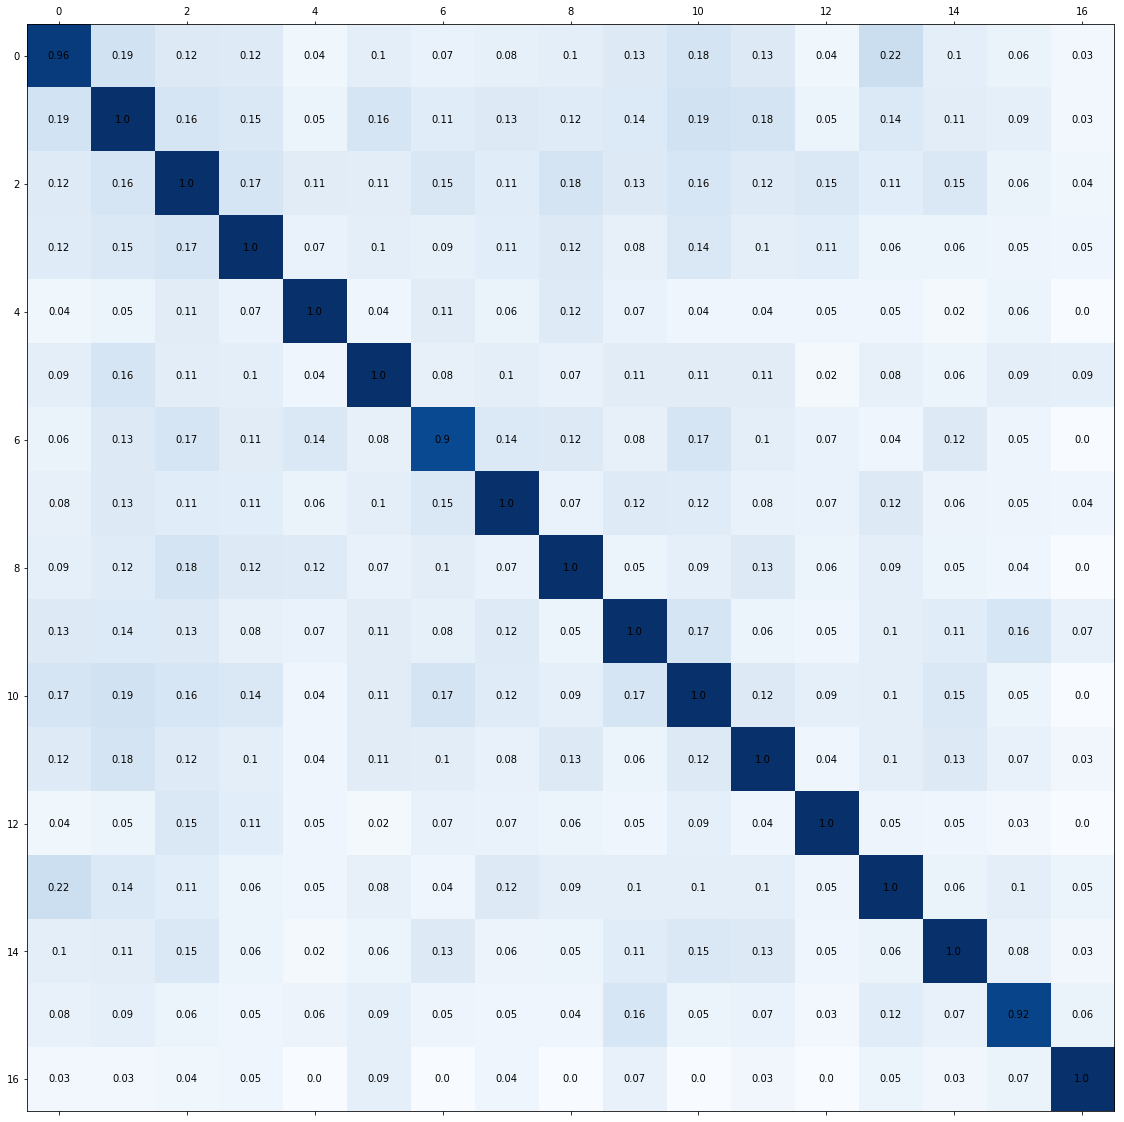

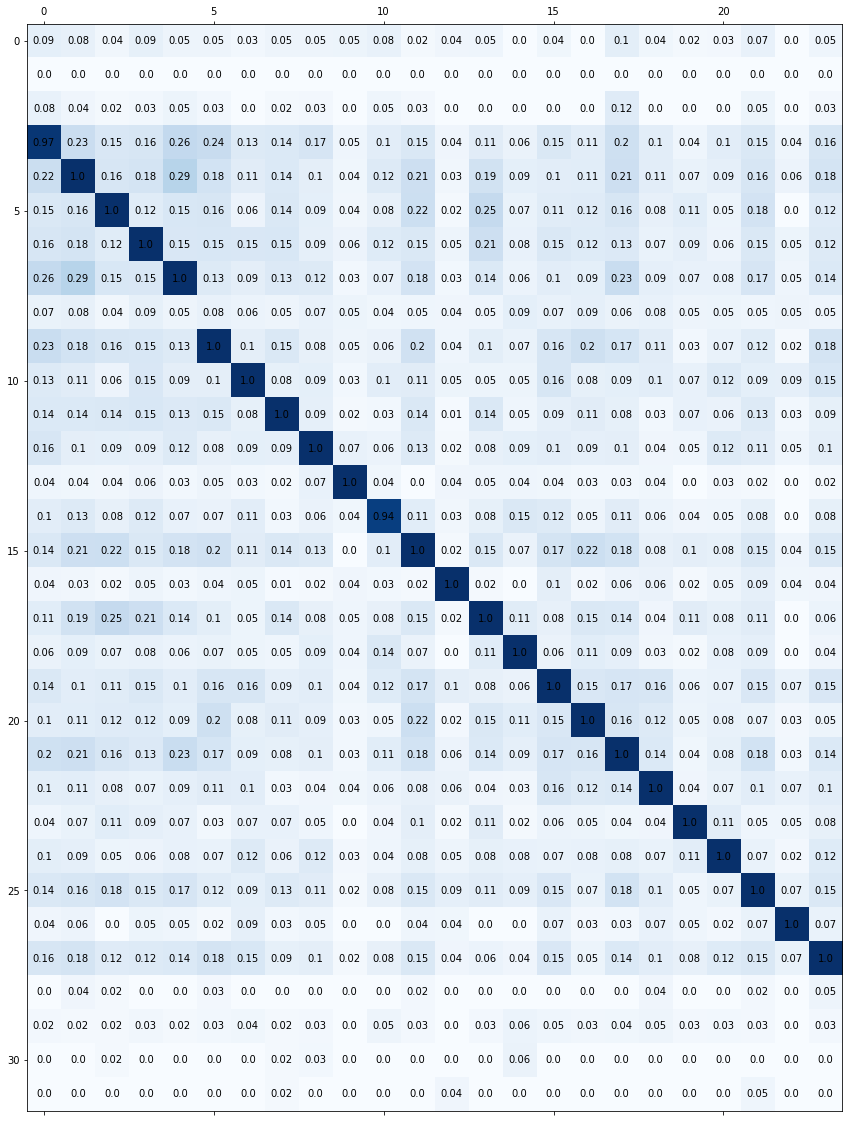

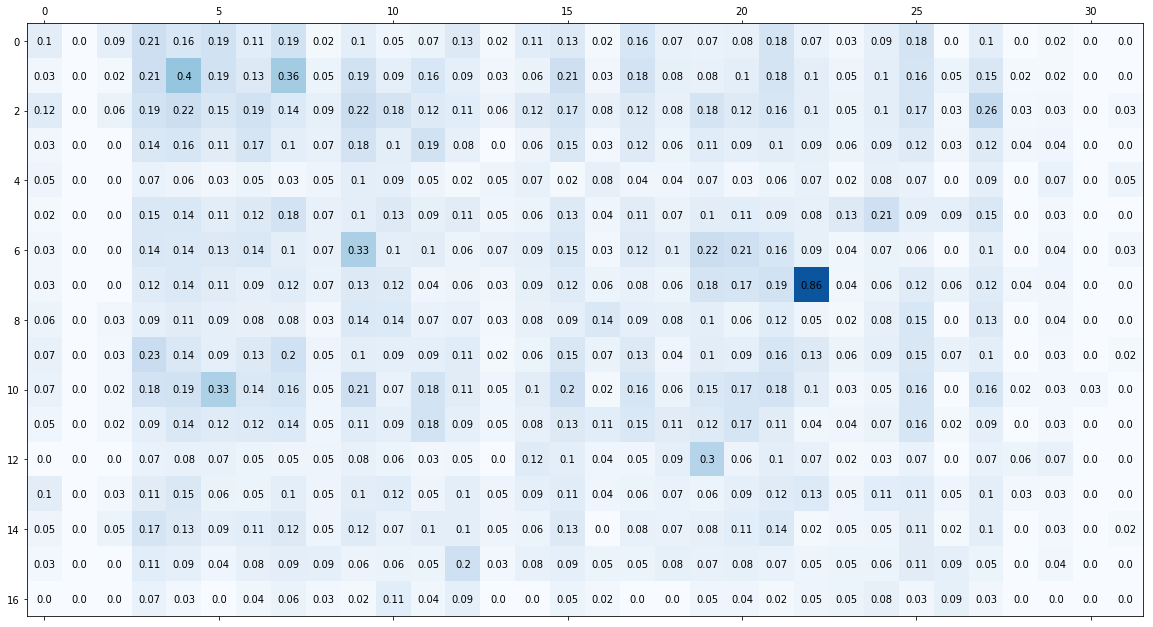

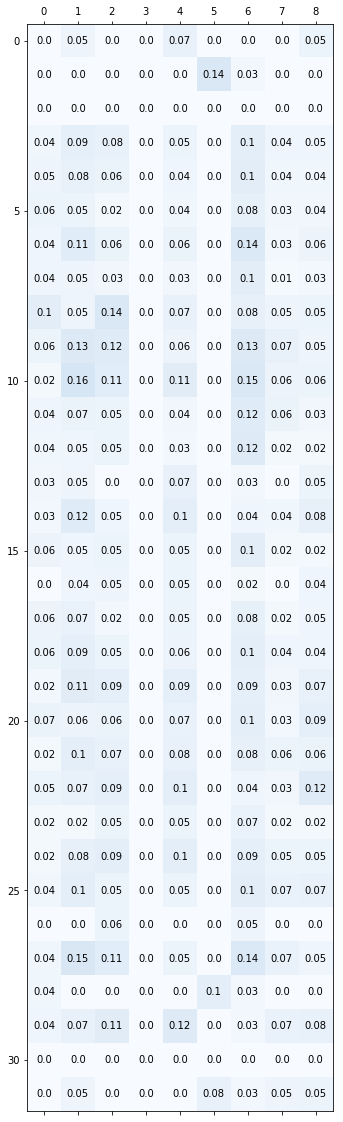

In [6]:
comparer = tc.DocumentComparisons()
jac_mat_r = comparer.jaccard_matrix(doc_r1, doc_r2)
jac_mat_ap = comparer.jaccard_matrix(doc_ap1, doc_ap2)
jac_mat_r_ap = comparer.jaccard_matrix(doc_r1, doc_ap1)
jac_mat_w = comparer.jaccard_matrix(doc_ap1, doc_w)

def display_jacmat(jacmat, normalize = False):
    print("Normalized sums of row, col max: ", sum(np.max(jacmat, 1))/jacmat.shape[0], 
                                                sum(np.max(jacmat, 0))/jacmat.shape[1])
    print("Mean: ", np.mean(jacmat))
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(111)
    if normalize:
        ax.matshow(jacmat, cmap = plt.cm.Blues)
    else:
        ax.matshow(jacmat, cmap = plt.cm.Blues, vmin = 0, vmax = 1)
    for i in range(jacmat.shape[0]):
        for j in range(jacmat.shape[1]):
            ax.text(j, i, round(jacmat[i, j], 2), va = "center", ha = "center")

display_jacmat(jac_mat_r)
display_jacmat(jac_mat_ap)
display_jacmat(jac_mat_r_ap)
display_jacmat(jac_mat_w)

Normalized sums of row, col max:  0.23812611300938796 0.16375737740388172
Mean:  0.060671006832952346


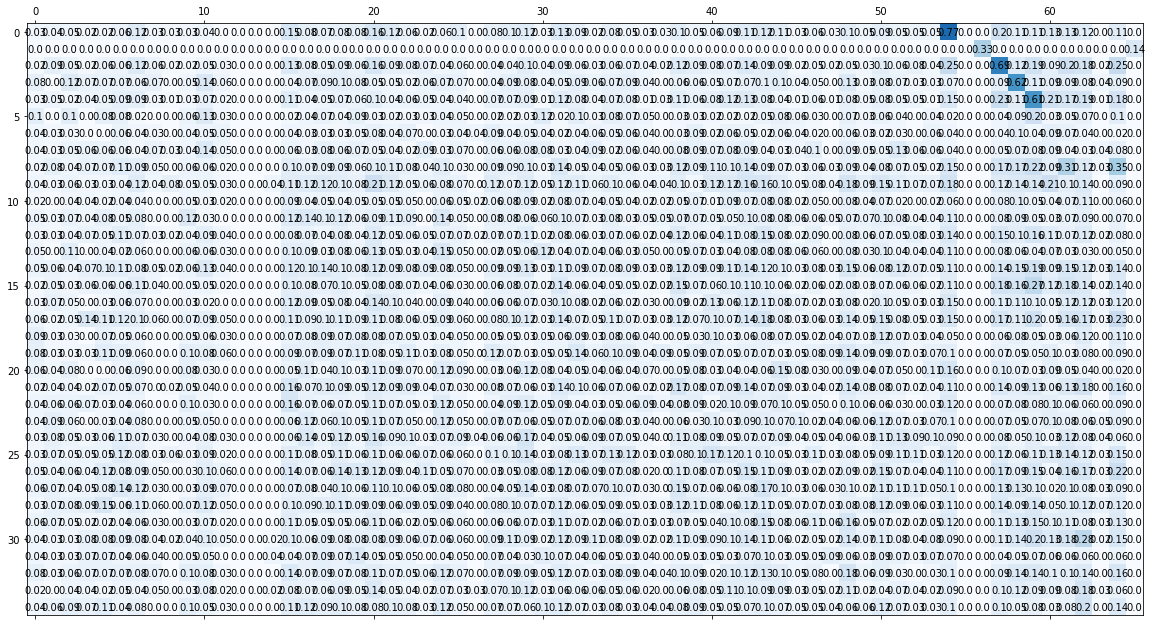

In [7]:
jac_mat_snip = comparer.jaccard_matrix(doc_6844, snip_6844)
display_jacmat(jac_mat_snip)

Normalized sums of row, col max:  0.11428571428571428 0.06060606060606061
Mean:  0.0017316017316017316
 Immigration activists rallied outside the Supreme Court in April as the justices heard arguments over the Trump administration's plan to ask about citizenship on the 2020 census.(J. 

 Immigration activists rally outside the Supreme Court as the justices hear arguments over the Trump administration's plan to ask about citizenship on the 2020 census, in Washington. 

 WASHINGTON — Just weeks before the Supreme Court is expected to rule on whether the Trump administration can add a citizenship question to the 2020 census, new evidence emerged Thursday suggesting that the question was crafted specifically to give an electoral advantage to white Republicans. 

 BOMBSHELL DEVELOPMENT IN CENSUS CASE: "Just weeks before the Supreme Court is expected to rule on whether the Trump administration can add a citizenship question to the 2020 Census, new evidence emerged Thursday suggesting the que

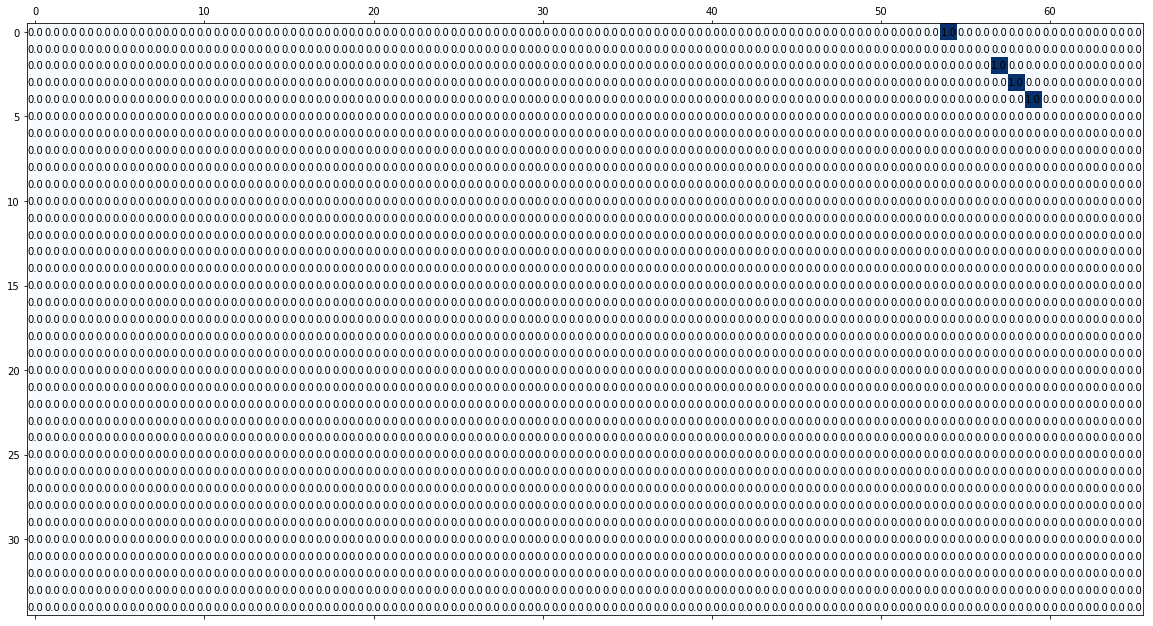

In [9]:
match_mat_snip = comparer.get_match_matrix(doc_6844, snip_6844)
display_jacmat(match_mat_snip)
comparer.print_sentence_matches()

In [10]:
temp_dict = {}
for doc_id in unique:
    doc = tc.Document(census_df[census_df["id"] == doc_id].iloc[0, 4])
    temp_dict[doc_id] = doc

Normalized sums of row, col max:  21.387099849932255 21.387099849932255
Mean:  1.5335921005153368
Diagonal sum:  320.8064977489838 Non-diagonal sum:  24.25172486696698


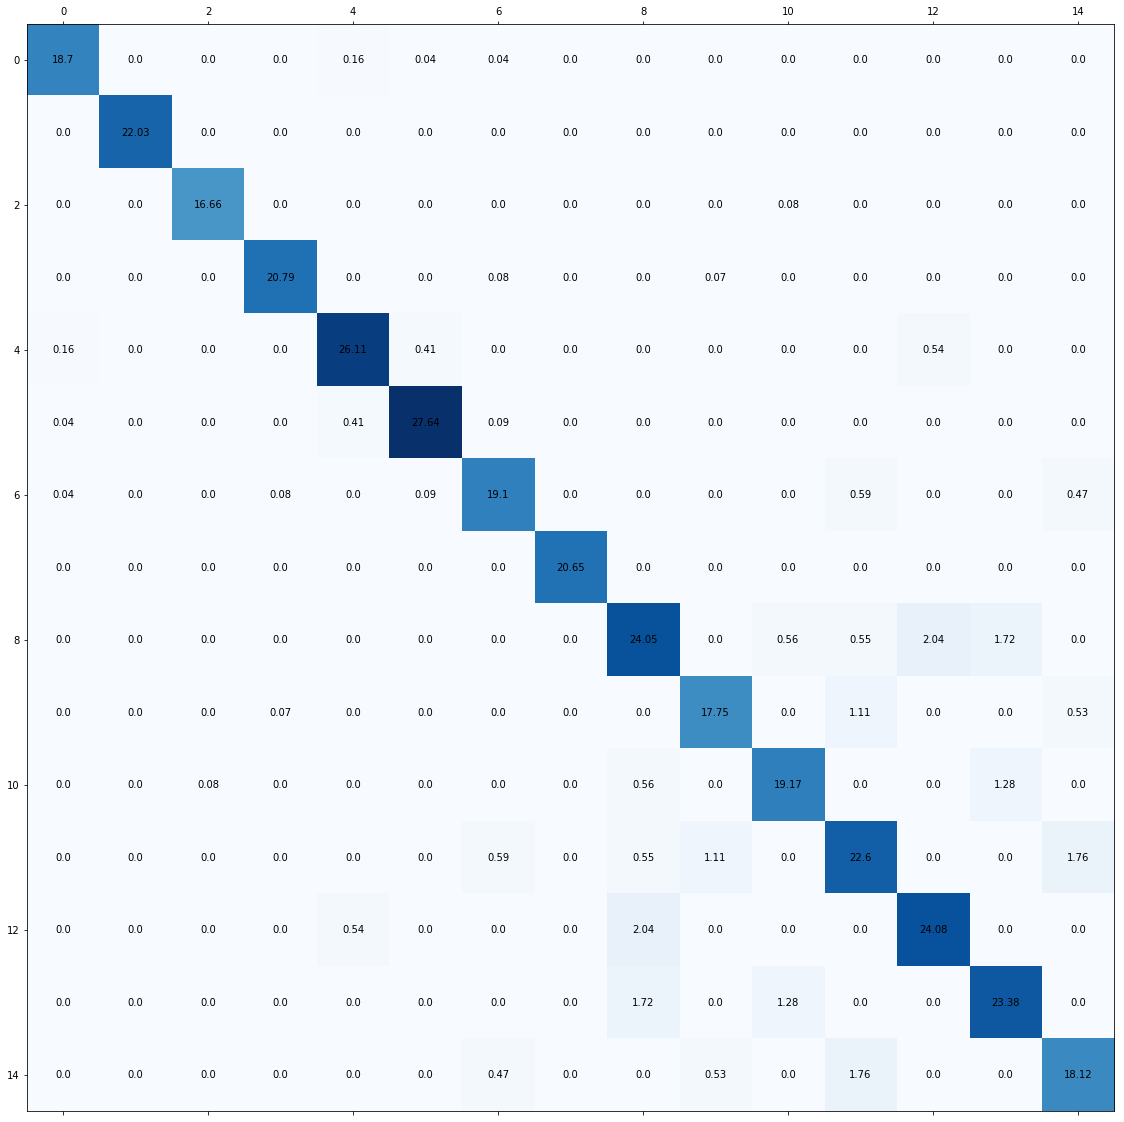

In [11]:
detector = tc.ArticleComparisons()
unique_dict = {}
for doc_id in unique:
    doc = tc.Document(census_df[census_df["id"] == doc_id].iloc[0, 4])
    unique_dict[doc_id] = doc

# 8985 = briefing of many news stories, includes snippet from 6844
unique_dict[8985] = tc.Document(census_df[census_df["id"] == 8985].iloc[0, 4])

score_mat = detector.jac_score_mat(unique_dict, weighted = True)
display_jacmat(score_mat, True)
print("Diagonal sum: ", np.trace(score_mat), "Non-diagonal sum: ", np.sum(score_mat) - np.trace(score_mat))

In [12]:
unique[11]

6844

Normalized sums of row, col max:  0.9967611277045239 0.9967611277045239
Mean:  0.13708649474199985
Diagonal sum:  14.951416915567858 Non-diagonal sum:  15.89304440138211


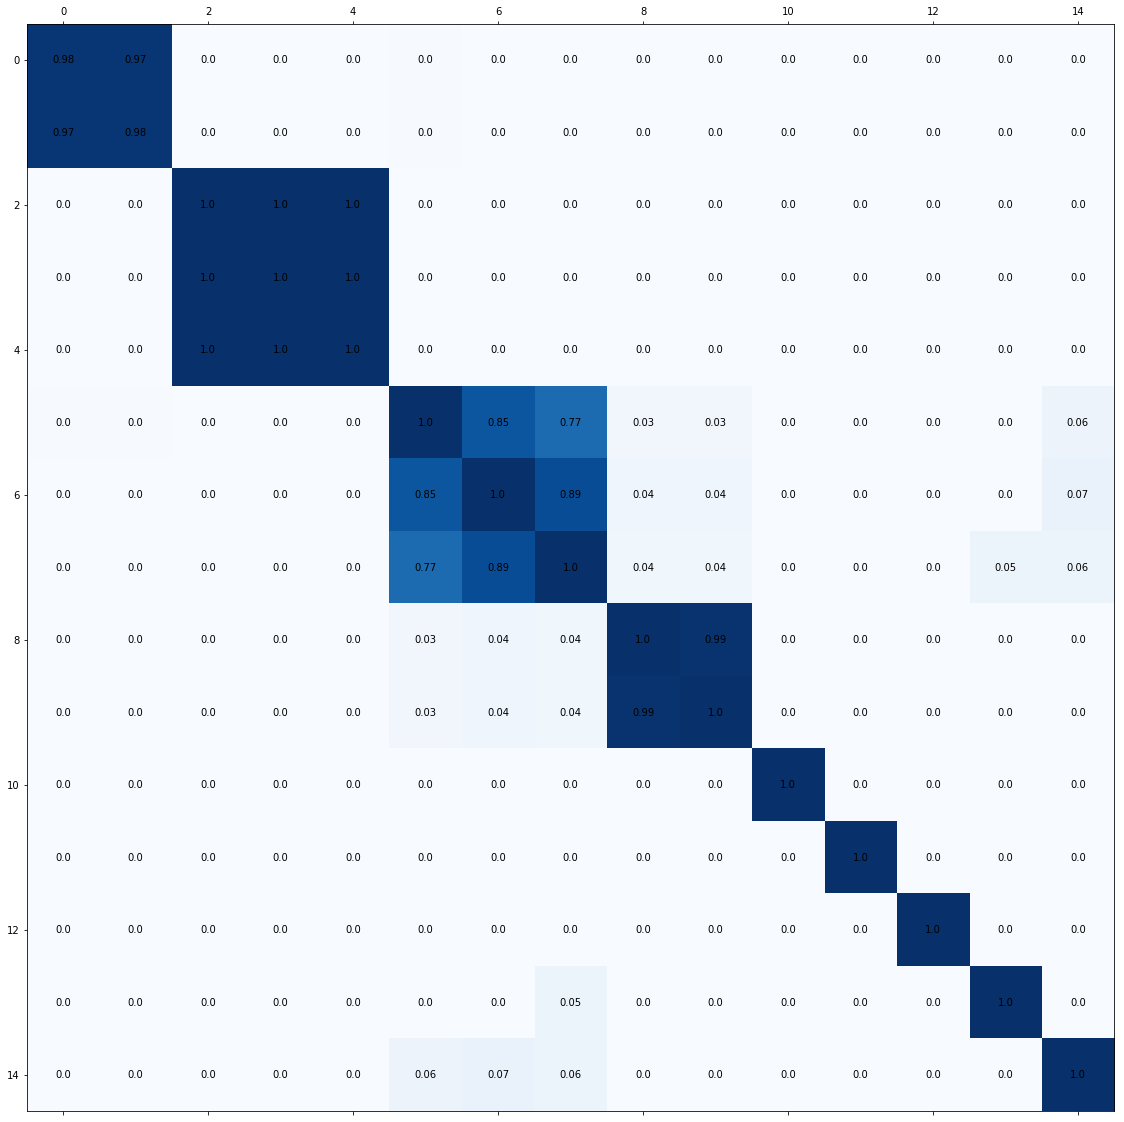

In [13]:
clusters_dict = {}
# 7624 = paraphrase of AP
# 8985 = briefing of many news stories, includes snippet from 6844
# 1766 = heavily based off of reuters 
for doc_id in clust_freshair + clust_levinson + clust_ap + clust_reuters + clust_wrong + [7624, 8985, 1766]:
    doc = tc.Document(census_df[census_df["id"] == doc_id].iloc[0, 4])
    clusters_dict[doc_id] = doc

score_mat = detector.jac_score_mat(clusters_dict, weighted = False)
display_jacmat(score_mat, True)
print("Diagonal sum: ", np.trace(score_mat), "Non-diagonal sum: ", np.sum(score_mat) - np.trace(score_mat))